<a href="https://colab.research.google.com/github/AndresAriasM/NN_Classification/blob/main/TrabajoFinalML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning
##Andrés Arias Medina

Modelo de clasificación con una red neuronal sencilla

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Brecha_Calidad (1).csv",encoding='latin1')

Acá recorte los datos por motivos practicos, es un dataset grande y al aplicar la función para balancear los datos lo que hare es volver el data set casi el doble de grande de lo que ya era... entonces hago esto por temas de tiempo en la ejecuciones.

In [ ]:
#Dividir los datos con el criterio 70-30
from sklearn.model_selection import train_test_split

descarte, datos = train_test_split(data, test_size = 0.30)

print("Datos descartados: ", len(descarte))
print("Datos empleados: ", len(datos))

Datos descartados:  17602
Datos empleados:  7545


Valores de la etiqueta:

In [ ]:
datos['existe competencia educaciÃ³n'].value_counts()

NO    6704
SI     841
Name: existe competencia educaciÃ³n, dtype: int64

#Explicación de los datos
Este dataset recopila información de profesionales que aplican a un determinado cargo, a partir de sus cualidades personales y técnicas se clasifica a la persona para ver si es apta o no para el puesto. Se evaluan caracteristicas como cargo actual, tipo de educación, profesión, habiliades... etc. La etiqueta o salida vendría siendo si es apto o no para el cargo, si es 1 y 2 es no.

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7545 entries, 18274 to 7528
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Encuesta                               7545 non-null   object
 1   Cargo u oficio por entrevistados       7545 non-null   object
 2   OcupaciÃ³n CUOC                        7545 non-null   object
 3   Prorgramas educativos para este cargo  7545 non-null   object
 4   Nivel educativo                        7545 non-null   object
 5   Municipio                              7545 non-null   object
 6   Competencia reportada con falencia     7545 non-null   object
 7   Tipo de competencia                    7545 non-null   object
 8   existe competencia educaciÃ³n          7545 non-null   object
dtypes: object(9)
memory usage: 589.5+ KB


In [ ]:
datos = datos.drop(['Encuesta','Municipio'], axis=1)
datos.head()

,Cargo u oficio por entrevistados,OcupaciÃ³n CUOC,Prorgramas educativos para este cargo,Nivel educativo,Competencia reportada con falencia,Tipo de competencia,existe competencia educaciÃ³n
18274,INGENIERO DE DESARROLLO,25120. DESARROLLADORES DE SOFTWARE,INGENIERÃA DE SISTEMAS,UNIVERSITARIO,TECNOLOGÃA DE INFORMACIÃN,DURAS,SI
23931,PROGRAMADOR,25120. DESARROLLADORES DE SOFTWARE,TECNOLOGÃA EN DESARROLLO DE SOFTWARE,TECNÃLOGO,COMPETITIVIDAD,BLANDAS,NO
10373,DIRECTOR DE TECNOLOGÃA,13302. DIRECTORES Y GERENTES DE SISTEMAS DE IN...,ESPECIALIZACIÃN EN DESARROLLO DE SOFTWARE,POSGRADO,BLOCKCHAIN,DURAS,NO
7790,DESARROLLADOR JUNIOR,25120. DESARROLLADORES DE SOFTWARE,TECNOLOGÃA EN DESARROLLO DE SOFTWARE,TECNÃLOGO,ORIENTACIÃN AL CLIENTE,BLANDAS,NO
8598,DESARROLLADOR SENIOR,25120. DESARROLLADORES DE SOFTWARE,TECNOLOGÃA EN SISTEMAS DE INFORMACIÃN,TECNÃLOGO,CONCENTRACIÃN,BLANDAS,NO


In [ ]:
datos.head()

,Cargo u oficio por entrevistados,OcupaciÃ³n CUOC,Prorgramas educativos para este cargo,Nivel educativo,Competencia reportada con falencia,Tipo de competencia,existe competencia educaciÃ³n
18274,INGENIERO DE DESARROLLO,25120. DESARROLLADORES DE SOFTWARE,INGENIERÃA DE SISTEMAS,UNIVERSITARIO,TECNOLOGÃA DE INFORMACIÃN,DURAS,SI
23931,PROGRAMADOR,25120. DESARROLLADORES DE SOFTWARE,TECNOLOGÃA EN DESARROLLO DE SOFTWARE,TECNÃLOGO,COMPETITIVIDAD,BLANDAS,NO
10373,DIRECTOR DE TECNOLOGÃA,13302. DIRECTORES Y GERENTES DE SISTEMAS DE IN...,ESPECIALIZACIÃN EN DESARROLLO DE SOFTWARE,POSGRADO,BLOCKCHAIN,DURAS,NO
7790,DESARROLLADOR JUNIOR,25120. DESARROLLADORES DE SOFTWARE,TECNOLOGÃA EN DESARROLLO DE SOFTWARE,TECNÃLOGO,ORIENTACIÃN AL CLIENTE,BLANDAS,NO
8598,DESARROLLADOR SENIOR,25120. DESARROLLADORES DE SOFTWARE,TECNOLOGÃA EN SISTEMAS DE INFORMACIÃN,TECNÃLOGO,CONCENTRACIÃN,BLANDAS,NO


Hago reemplazo de algunas columnas por datos númericos para facilitar la predicción, esto dado que son columnas que teniene poca variedad de datos y es fácil contarlos y manejarlos.

In [ ]:
datos = datos.replace({"BLANDAS": 1, "DURAS": 2})
datos = datos.replace({"SI": 1, "NO":0})
datos = datos.replace({"UNIVERSITARIO": 1, "POSGRADO":2,"TECNÃLOGO": 3, "TÃCNICO":4})

#Cambio a númericas

##Tipo de competencia
·Blandas - 1
·Duras -2

##existe competencia educaciÃ³n
·Si - 1
·No - 0

##Nivel educativo
·Universitario - 1
·Posgrado - 2
·Tecnologo - 3
·Tecnico - 4



In [ ]:
datos.head()

,Cargo u oficio por entrevistados,OcupaciÃ³n CUOC,Prorgramas educativos para este cargo,Nivel educativo,Competencia reportada con falencia,Tipo de competencia,existe competencia educaciÃ³n
18274,INGENIERO DE DESARROLLO,25120. DESARROLLADORES DE SOFTWARE,INGENIERÃA DE SISTEMAS,1,TECNOLOGÃA DE INFORMACIÃN,2,1
23931,PROGRAMADOR,25120. DESARROLLADORES DE SOFTWARE,TECNOLOGÃA EN DESARROLLO DE SOFTWARE,3,COMPETITIVIDAD,1,0
10373,DIRECTOR DE TECNOLOGÃA,13302. DIRECTORES Y GERENTES DE SISTEMAS DE IN...,ESPECIALIZACIÃN EN DESARROLLO DE SOFTWARE,2,BLOCKCHAIN,2,0
7790,DESARROLLADOR JUNIOR,25120. DESARROLLADORES DE SOFTWARE,TECNOLOGÃA EN DESARROLLO DE SOFTWARE,3,ORIENTACIÃN AL CLIENTE,1,0
8598,DESARROLLADOR SENIOR,25120. DESARROLLADORES DE SOFTWARE,TECNOLOGÃA EN SISTEMAS DE INFORMACIÃN,3,CONCENTRACIÃN,1,0


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7545 entries, 18274 to 7528
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Cargo u oficio por entrevistados       7545 non-null   object
 1   OcupaciÃ³n CUOC                        7545 non-null   object
 2   Prorgramas educativos para este cargo  7545 non-null   object
 3   Nivel educativo                        7545 non-null   int64 
 4   Competencia reportada con falencia     7545 non-null   object
 5   Tipo de competencia                    7545 non-null   int64 
 6   existe competencia educaciÃ³n          7545 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 471.6+ KB


Convierto los datos a tipo category para poder aplicar posteriormente las dummies, acá se aplicaron dummies por ser columnas con exceso de datos diferentes o por ser muy variados.

In [ ]:
datos['Cargo u oficio por entrevistados']=datos['Cargo u oficio por entrevistados'].astype('category')
datos['Prorgramas educativos para este cargo']=datos['Prorgramas educativos para este cargo'].astype('category')
datos['OcupaciÃ³n CUOC']=datos['OcupaciÃ³n CUOC'].astype('category')
datos['Competencia reportada con falencia']=datos['Competencia reportada con falencia'].astype('category')

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7545 entries, 18274 to 7528
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Cargo u oficio por entrevistados       7545 non-null   category
 1   OcupaciÃ³n CUOC                        7545 non-null   category
 2   Prorgramas educativos para este cargo  7545 non-null   category
 3   Nivel educativo                        7545 non-null   int64   
 4   Competencia reportada con falencia     7545 non-null   category
 5   Tipo de competencia                    7545 non-null   int64   
 6   existe competencia educaciÃ³n          7545 non-null   int64   
dtypes: category(4), int64(3)
memory usage: 283.7 KB


In [ ]:
datos = pd.get_dummies(datos, columns=['Cargo u oficio por entrevistados','Prorgramas educativos para este cargo','OcupaciÃ³n CUOC','Competencia reportada con falencia'], drop_first=False)

Se opta por balancear los datos debido al desnivel en la etiqueta

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X= datos.loc[:, datos.columns != 'existe competencia educaciÃ³n']
y= datos['existe competencia educaciÃ³n']
X, y = smote.fit_resample(X, y)

datos = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

In [ ]:
datos['existe competencia educaciÃ³n'].value_counts()

1    6704
0    6704
Name: existe competencia educaciÃ³n, dtype: int64

In [ ]:
#Definir variables de entrada y variable de salida
xtrain = datos.loc[:, datos.columns != 'existe competencia educaciÃ³n']
ytrain = datos['existe competencia educaciÃ³n']

(array([13386.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,    22.]),
 array([-0.0405402 ,  2.43020096,  4.90094212,  7.37168328,  9.84242444,
        12.31316561, 14.78390677, 17.25464793, 19.72538909, 22.19613025,
        24.66687142]),
 <a list of 10 Patch objects>)

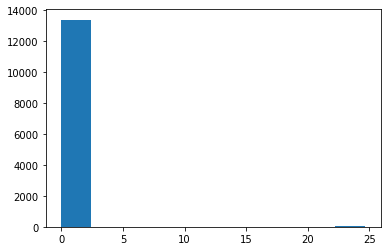

In [ ]:
#Normalización de las caracteristicas del conjunto de entrenamiento
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
xtrainN = sc.transform(xtrain)
plt.hist(xtrainN[:,3])

In [ ]:
#Modelo de clasificación con redes neuronales
from sklearn.neural_network import MLPClassifier
X = xtrainN
y = ytrain
clf = MLPClassifier(solver='lbfgs', learning_rate='constant', alpha=0.05, learning_rate_init=0.01,
                     hidden_layer_sizes=(10,10), random_state=0, activation="logistic",max_iter=200000) #alpha, regularización, solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
clf.fit(X,y)

MLPClassifier(activation='logistic', alpha=0.05, hidden_layer_sizes=(10, 10),
              learning_rate_init=0.01, max_iter=200000, random_state=0,
              solver='lbfgs')

In [ ]:
#Metricas del clasificador
from sklearn import metrics
print ("Train - MetricasClasificador: \n", metrics.classification_report
(ytrain, clf.predict(xtrainN)))

Train - MetricasClasificador: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      6704
           1       0.97      0.97      0.97      6704

    accuracy                           0.97     13408
   macro avg       0.97      0.97      0.97     13408
weighted avg       0.97      0.97      0.97     13408



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


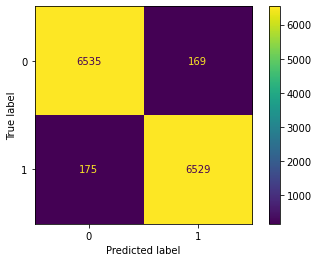

In [ ]:
#Matriz de confusion
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,xtrainN, ytrain)

#Mejor métrica
En este caso seleccione la precisión, dado que es de suma importancia una correcta clasificación de los candidatos aspirantes a una compañia, se debe garantizar que cumplan los requerimientos necesarios para ofrecer un buen desempeño, en el caso de existir algún "infiltrado" pueden darse problemas de calidad, integridad o de productividad que lleven a problemas mayores dentro de la empresa. Por ejemplo, si el puesto es para un senior, de ninguna manera pueda admitirse un junior.

#Gridsearch

Para el gridsearch probé muchas opciones por cada parámetro, las que estan comentadas son las que dejé para las pruebas finales, lo hice de esta forma debido a que cada ejecución con varias opciones en los parámetros se demoraba bastante. Hay algunos parámetros con opciones únicas, esto porque fueron la mejor opción dentro de las que aparecen ahí comentadas.*

In [ ]:
#GridSearch para hallar los mejores parametros de la red neuronal
from sklearn.model_selection import GridSearchCV

X = xtrainN
y = ytrain

mlp_gs = MLPClassifier(max_iter=10000)
parameters= {
    'hidden_layer_sizes': [(15,15,15),(10,10)],#(20,10),(10,10,10),(15,15),(10,),(20,),(10,10),(5,5,5,5)],
    'activation': ['relu'],#,'logistic'],#'tanh','identity’,],
    'solver': ['adam','lbfgs'],#sgd
    'alpha': [0.5,0.01],#2,0.1],
    'learning_rate': ['constant'],#'adaptive'],
    'learning_rate_init':[1,0.5],#0.1,0.5,2] #10
}

clf = GridSearchCV(mlp_gs, parameters, refit = True, verbose =3,scoring="accuracy",cv=3)
clf.fit(X, y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END activation=relu, alpha=0.5, hidden_layer_sizes=(15, 15, 15), learning_rate=constant, learning_rate_init=1, solver=adam;, score=0.500 total time=   6.5s
[CV 2/3] END activation=relu, alpha=0.5, hidden_layer_sizes=(15, 15, 15), learning_rate=constant, learning_rate_init=1, solver=adam;, score=0.500 total time=   7.6s
[CV 3/3] END activation=relu, alpha=0.5, hidden_layer_sizes=(15, 15, 15), learning_rate=constant, learning_rate_init=1, solver=adam;, score=0.500 total time=   8.7s
[CV 1/3] END activation=relu, alpha=0.5, hidden_layer_sizes=(15, 15, 15), learning_rate=constant, learning_rate_init=1, solver=lbfgs;, score=0.876 total time=  37.3s
[CV 2/3] END activation=relu, alpha=0.5, hidden_layer_sizes=(15, 15, 15), learning_rate=constant, learning_rate_init=1, solver=lbfgs;, score=0.946 total time= 2.5min
[CV 3/3] END activation=relu, alpha=0.5, hidden_layer_sizes=(15, 15, 15), learning_rate=constant, learning_rate_

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=10000),
             param_grid={'activation': ['relu'], 'alpha': [0.5, 0.01],
                         'hidden_layer_sizes': [(15, 15, 15), (10, 10)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [1, 0.5],
                         'solver': ['adam', 'lbfgs']},
             scoring='accuracy', verbose=3)

In [ ]:
#Imprimir los mejores parámetros
print(clf.best_params_)

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (15, 15, 15), 'learning_rate': 'constant', 'learning_rate_init': 1, 'solver': 'lbfgs'}
